In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt
from utils import read_l3, save_ameriflux
# import mpl_axes_aligner
# import seaborn as sns
# import zipfile
# from cycler import cycler
# default_cycler = (plt.rcParams['axes.prop_cycle'][:4] + cycler(linestyle=['-', '--', ':', '-.']))

pd.set_option(
    'display.float_format', '{:.4f}'.format,
    'display.max_columns', None,
)
np.set_printoptions(suppress=True)


plt.rcParams.update({'axes.grid' : True, 
                     'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
                     'axes.labelcolor' : 'black',
                     'yaxis.labellocation' : 'center',
                     'lines.marker' : '.',
                     'lines.linestyle' : 'None',
                     'grid.color' : '.8',
                     # 'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (10*1.8, 5.65*1.8),
                     'mathtext.default' : 'regular',
                     'legend.markerscale' : 4
                    })
# global plotting settings
plt.style.use('dark_background')

# plt.rc('axes', prop_cycle=default_cycler)

## Outputting thesis fluxes for AmeriFLux

In [2]:
# filepath = os.path.join(os.getcwd(), 'output', 'csv', f'ATMOS_L3_{datetime.now().strftime("%Y-%m-%d")}_ch4gapfilled.csv')
filepath = r"C:\Users\ottob\data\atmos-flux-data\processed\ATMOS_L3_2024-08-12_ch4gapfilled.csv" # Windows
ameriflux = save_ameriflux(filepath, save_file=True)
# ameriflux

In [3]:
# ameriflux.columns[ameriflux.columns.str.contains('TS')]

In [5]:
# cols = ['SWC_mean', 'SWC_30cm', 'SWC_50cm']
cols = ['FCH4', 'FCH4_F_RF', 'SW_IN',]
cols = ['RH', 'SW_IN', 'SW_IN_POT']
# cols = ameriflux.columns[ameriflux.columns.str.contains('SWC_')][:64]
df = (ameriflux.loc[:, cols]
        .replace(-9999, np.nan)
     )
df.describe()

,RH,SW_IN,SW_IN_POT
count,25423.0000,10686.0000,27572.0000
mean,55.2164,189.2648,333.3434
std,16.5480,254.2388,413.4472
min,2.7830,0.0000,0.0000
25%,43.0556,0.0000,0.0000
50%,55.6240,52.1500,40.8520
75%,67.9903,313.1750,658.0750
max,100.0000,1219.6000,1262.4500


[(-2.07785, 104.86085), (-60.98, 1280.58), (-63.1225, 1325.5725)]


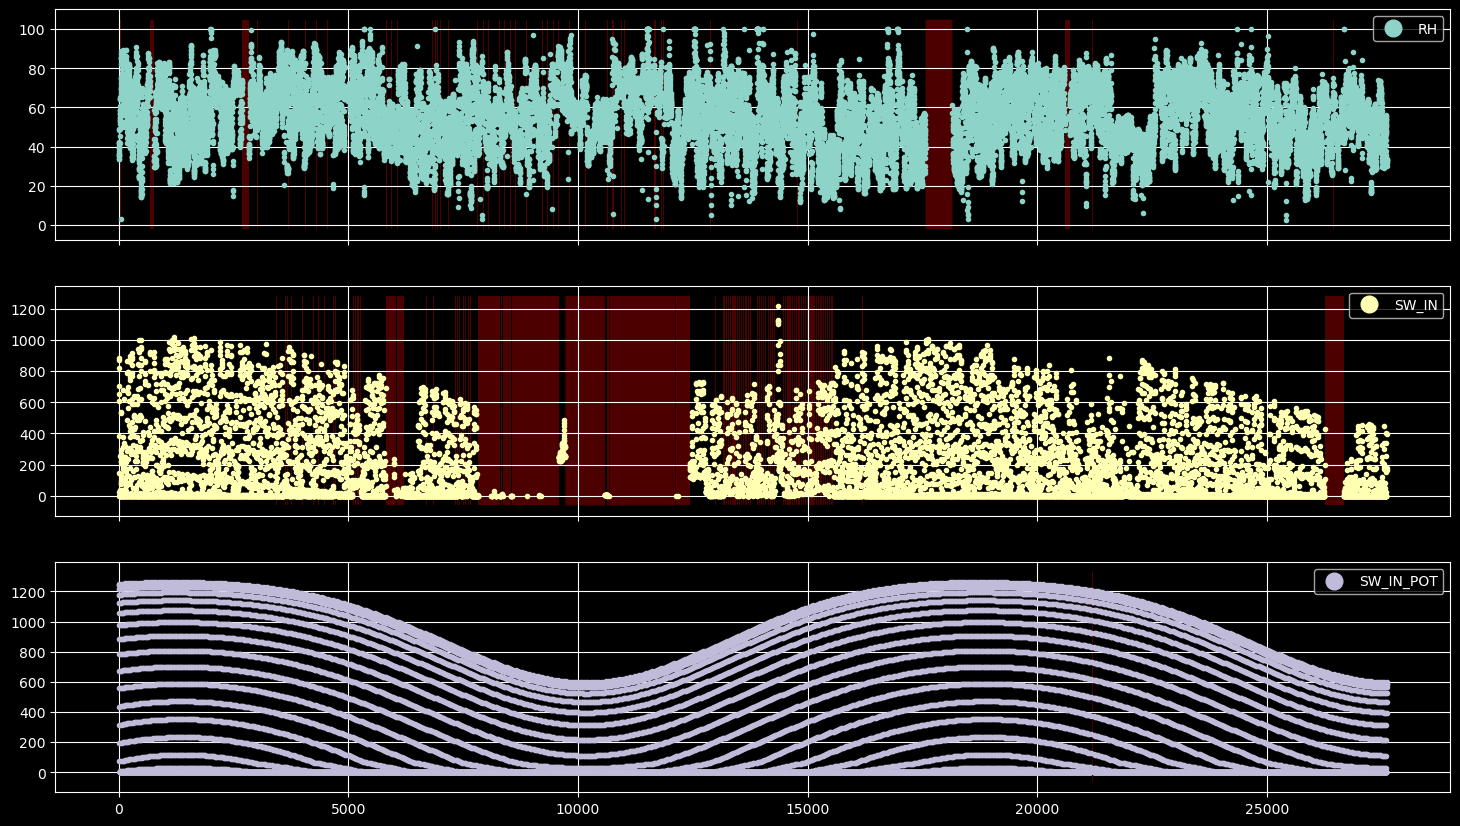

In [6]:
axs = df.plot(subplots=True)
print([ax.get_ylim() for ax in axs])
for n, col in enumerate(df.columns):
    axs[n].fill_between(df.index, axs[n].get_ylim()[0], axs[n].get_ylim()[1], where=df[col].isna(), facecolor='red', alpha=0.3)

In [7]:
ameriflux[ameriflux.columns[ameriflux.columns.str.contains('TS')]]

,TS10,TS100,TS10F,TS_00,TS_01,TS_02,TS_12,TS_11,TS_10,TS_20,TS_21,TS_22,TS_32,TS_31,TS_30,TS_40,TS_41,TS_42,TS_52,TS_51,TS_50,TS_60,TS_61,TS_62,TS_72,TS_71,TS_70,TS_03,TS_04,TS_14,TS_13,TS_24,TS_23,TS_33,TS_34,TS_44,TS_43,TS_30cm,TS_50cm,TS_53,TS_54,TS_64,TS_63,TS_74,TS_73,TS_05,TS_06,TS_07,TS_17,TS_16,TS_15,TS_25,TS_26,TS_27,TS_37,TS_36,TS_35,TS_45,TS_46,TS_47,TS_57,TS_56,TS_55,TS_65,TS_66,TS_67,TS_77
0,13.6000,-9999.0000,8.7000,-9999.0000,13.5800,-9999.0000,14.6300,13.4000,12.9000,-9999.0000,13.5800,-9999.0000,14.6300,13.4000,12.9000,-9999.0000,14.6000,14.0700,13.6000,14.6400,13.5000,15.0700,14.9600,15.0000,15.0500,15.2400,15.3000,14.5000,14.7000,14.7000,14.6100,14.7700,14.8000,14.2400,15.4300,14.4000,14.8900,14.9000,14.5000,14.8000,14.9700,13.9600,15.1900,15.3300,15.3000,14.8000,14.1400,14.3600,15.3100,14.6000,13.6600,14.7400,15.0100,14.5000,14.5000,-9999.0000,14.9200,-9999.0000,14.8800,14.9800,14.9700,15.2000,13.9600,14.9300,14.9000,15.2000,15.2900
1,-9999.0000,-9999.0000,-9999.0000,-9999.0000,13.5000,-9999.0000,14.5900,13.3400,12.8000,-9999.0000,13.5000,-9999.0000,14.5900,13.3400,12.8000,-9999.0000,14.5400,14.0000,13.5000,14.6000,13.4700,15.0000,14.9000,14.9500,15.0000,15.2000,15.2600,14.4200,14.6000,14.6700,14.5400,14.7000,14.7300,14.1600,15.3600,14.3400,14.8000,14.8100,14.5000,14.7300,14.9000,13.9000,15.1000,15.2700,15.2300,14.7100,14.1000,14.3000,15.2300,14.5800,13.6000,14.7000,14.9400,14.4300,14.4700,-9999.0000,14.9000,-9999.0000,14.8000,14.9000,14.8900,15.2000,13.9000,14.9000,14.8300,15.1700,15.2000
2,13.6000,-9999.0000,8.7000,-9999.0000,13.4900,-9999.0000,14.5000,13.3000,12.8000,-9999.0000,13.4900,-9999.0000,14.5000,13.3000,12.8000,-9999.0000,14.4900,13.9600,13.5000,14.5000,13.4000,14.9500,14.8500,14.9000,14.9500,15.1400,15.2000,14.4000,14.5500,14.6000,14.4700,14.6100,14.6700,14.0800,15.2900,14.3000,14.7500,14.8000,14.4800,14.7000,14.8000,13.8400,15.0100,15.2000,15.2000,14.7000,14.0400,14.2200,15.1800,14.5000,13.5900,14.6100,14.8800,14.4000,14.4000,-9999.0000,14.8200,-9999.0000,14.7200,14.8600,14.8000,15.1100,13.9000,14.8500,14.8000,15.1000,15.2000
3,-9999.0000,-9999.0000,-9999.0000,-9999.0000,13.4000,-9999.0000,14.4500,13.2600,12.8000,-9999.0000,13.4000,-9999.0000,14.4500,13.2600,12.8000,-9999.0000,14.4000,13.9000,13.4300,14.4500,13.4000,14.9000,14.8000,14.8300,14.9000,15.1000,15.2000,14.3000,14.5000,14.5400,14.4000,14.5600,14.6000,14.0000,15.2000,14.2100,14.7000,14.7000,14.4000,14.6000,14.7300,13.8000,14.9400,15.1600,15.1800,14.6100,14.0000,14.2000,15.1000,14.4800,13.5000,14.5900,14.8000,14.3200,14.4000,-9999.0000,14.8000,-9999.0000,14.6700,14.8000,14.7300,15.0900,13.8200,14.8000,14.7300,15.0400,15.1100
4,13.7000,-9999.0000,8.7000,-9999.0000,13.4000,-9999.0000,14.4000,13.2000,12.7900,-9999.0000,13.4000,-9999.0000,14.4000,13.2000,12.7900,-9999.0000,14.4000,13.9000,13.4000,14.4000,13.3100,14.8700,14.7600,14.8000,14.8700,15.0300,15.1000,14.2800,14.4400,14.5000,14.4000,14.5000,14.5400,13.9200,15.1900,14.2000,14.6100,14.6900,14.4000,14.6000,14.6900,13.7400,14.9000,15.1000,15.1000,14.6000,14.0000,14.1600,15.0300,14.4000,13.5000,14.5000,14.7400,14.3000,14.3000,-9999.0000,14.7500,-9999.0000,14.6000,14.7500,14.7000,15.0000,13.8000,14.8000,14.7000,15.0000,15.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27605,-9999.0000,-9999.0000,-9999.0000,2.4100,2.4000,2.2000,2.7000,2.3000,2.1000,-9999.0000,2.5000,2.4000,-9999.0000,-9999.0000,-9999.0000,2.2000,2.5000,2.3000,2.5100,2.5000,2.2000,-9999.0000,2.8000,3.6000,3.0000,2.7000,3.0000,-9999.0000,2.5000,-9999.0000,2.4100,2.8000,3.0000,2.4900,2.9000,2.6000,-9999.0000,3.1000,4.3000,2.2000,2.4000,2.4000,2.6000,2.3500,2.7000,-9999.0000,-9999.0000,-9999.0000,6.1800,2.6000,2.2000,2.6000,2.6000,2.8100,2.8000,1.9000,3.9000,2.5000,2.1000,2.5000,2.4000,2.7000,-9999.0

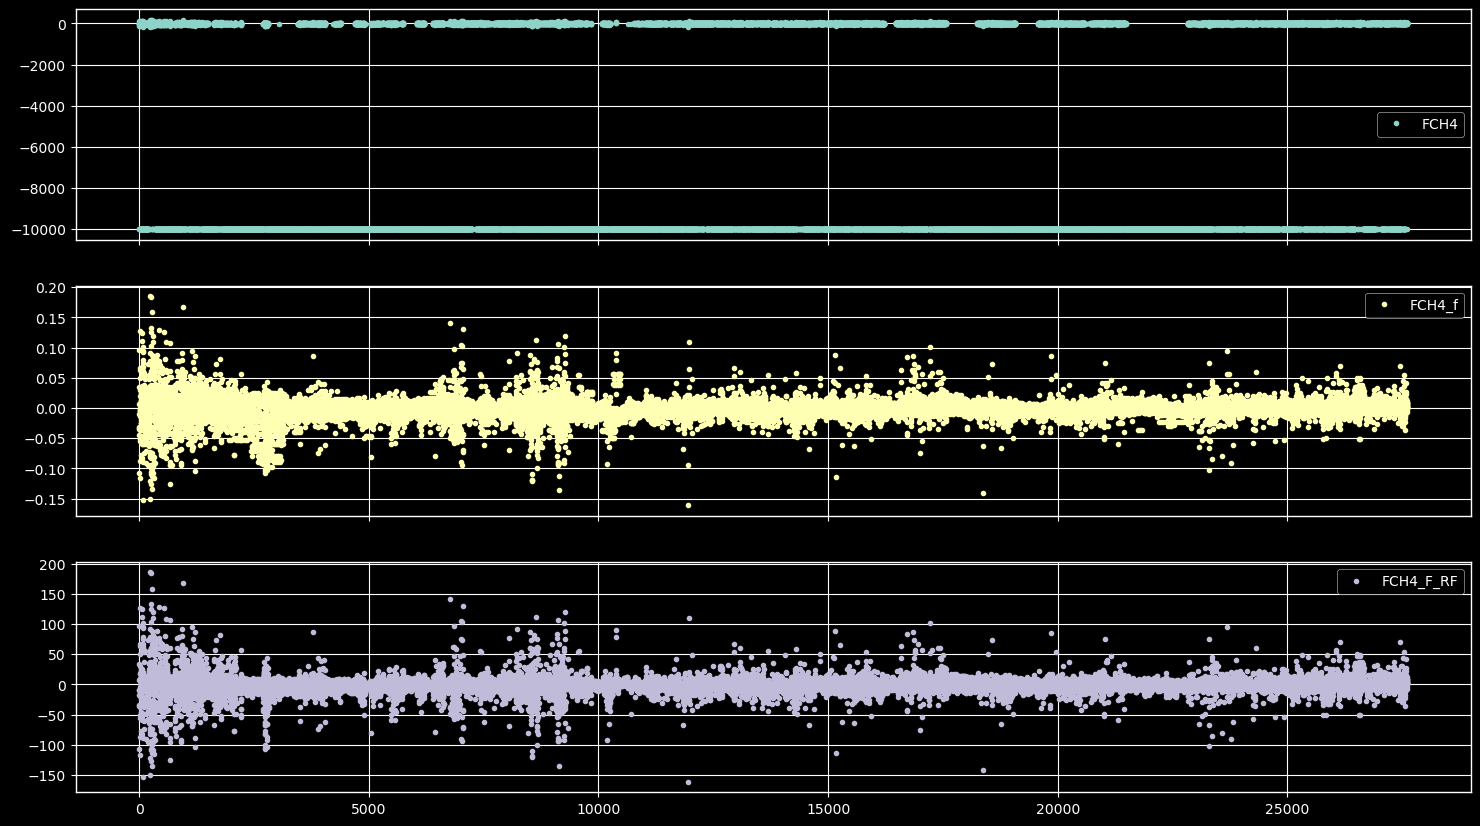

In [20]:
ameriflux[['FCH4', 'FCH4_f', 'FCH4_F_RF']].plot(subplots=True)
plt.show()

## Join L3 fluxes with fluxgapfill gap filled ch4

In [ ]:
data_dir = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/'

# define fluxgapfill models to join
models = ['RF']
# models = ['RF', 'ANN']

# filepath = '/home/otto/data/atmos-flux-data/processed/ATMOS_L3_2023-04-25_fluxgapfill.csv' # Linux
filepath = r"C:\Users\ottob\data\atmos-flux-data\processed\ATMOS_L3_2024-06-11.csv" # Windows
l3 = read_l3(filepath)
# predictors = 'all'
filepath = r"C:\Users\ottob\data\atmos-flux-data\methane-gapfill\data\ATMOS_20240516_all\gapfilled\rf_predictors_laplace.csv"
rf = read_l3(filepath).add_suffix('_RF')    
# filepath = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/ATMOS_20230425_{predictors}/gapfilled/ann_predictors_laplace.csv'
# ann = read_l3(filepath).add_suffix('_ANN')

l3 = pd.concat([
    l3, 
    rf.loc[:,'FCH4_F_RF':], 
    # ann.loc[:,'FCH4_F_ANN':],
    ], axis=1)

l3.to_csv(f'./output/csv/ATMOS_L3_{datetime.now().strftime("%Y-%m-%d")}_ch4gapfilled.csv', index = False)

## Annual metrics

In [2]:
cols = ['TA_EP','T60','Tsoil_mean','SWC_mean','Precip']

annualmet = l3[cols].agg(['mean', 'min', 'max'])
annualmet.loc['sum', 'Precip'] = l3.loc[:, 'Precip'].sum()
annualmet.loc['std', ['TA_EP', 'T60', 'Tsoil_mean', 'SWC_mean']] = l3.loc[:, ['TA_EP', 'T60', 'Tsoil_mean', 'SWC_mean']].std()
# mean and standard deviation of TA_EP, mean and ReddyProc unc of co2_flux, mean and gap-fill unc of FCH4

# annualmet.loc['uncertainty', :] = annualmet.std()
# annualmet.loc['uncertainty', ['NEE_f','co2_flux','FCH4_f','FCH4_F_RF']] = np.NaN

annualmet

,TA_EP,T60,Tsoil_mean,SWC_mean,Precip
mean,12.5219,12.0268,11.5006,0.3027,0.1156
min,-23.1185,-18.4000,1.6865,0.1573,0.0000
max,36.6963,34.8000,22.7450,0.4286,67.3000
sum,NaN,NaN,NaN,NaN,810.8000
std,11.7231,10.8633,7.2354,0.0819,NaN


In [3]:
cols = [f'FCH4_F{i}_RF' for i in range(1,11)]
model_sum = l3.loc[:, cols].sum(axis=0) * 1800 / 1000 / 1000 * 12.01
ch4_budget = [model_sum.mean(), model_sum.std() * 1.4210]
ch4_budget
# model_sum

[-0.3816044614926144, 3.0614157890823375]

In [4]:
ustars = l3.loc[:, 'ustar_thr'].unique()
ustars

array([0.14981061, 0.194696  ])

In [5]:
cols = ['ch4_flux', 'co2_flux', 'h2o_flux', 'NEE_f', 'FCH4_F_RF']
data_coverage = l3[cols].count()/l3.shape[0]
data_coverage

ch4_flux    0.3674
co2_flux    0.5446
h2o_flux    0.5681
NEE_f       1.0000
FCH4_F_RF   1.0000
dtype: float64

In [6]:
umoltogC = 1800 / 1000 / 1000 * 12.01 # [umol m-2 s-1] * (s 30min-1) / (umol mmol-1) / (mmol mol-1) * (gC molC-1)
umoltomgC = 1800 / 1000 * 12.01 # [umol m-2 s-1] * (s 30min-1) / (umol mmol-1) * (mgC mmolC-1)
cols = ['ch4_flux','FCH4_f', 'FCH4_F_ANN', 'FCH4_F_RF', 'co2_flux', 'NEE_f', 'GPP_f', 'Reco']
budget = l3[cols] * umoltogC
budget = budget.sum(axis=0)
budget['H_f'] = l3['H_f'].sum() / 1000
budget['LE_f'] = l3['LE_f'].sum() / 1000
# budget['NEE_%grow'] = l3.loc['2022-06':'2022-09-01', 'NEE_f'].sum()
budget['FCH4_uptake'] = l3.loc[l3['FCH4_F_RF']<0, 'FCH4_F_RF'].sum() * umoltogC
budget['FCH4_emission'] = l3.loc[l3['FCH4_F_RF']>0, 'FCH4_F_RF'].sum() * umoltogC
budget['FCH4_uptake%'] = budget['FCH4_uptake'] / (abs(budget['FCH4_uptake']) + abs(budget['FCH4_emission']))
budget['FCH4_emission%'] = budget['FCH4_emission'] / (abs(budget['FCH4_uptake']) + abs(budget['FCH4_emission']))
budget['FCH4_co2eq'] = budget['FCH4_F_RF'] / 12.01 * 16.04 * 45
budget['FCH4_co2eq_up'] = budget['FCH4_uptake'] / 12.01 * 16.04 * 45
budget['FCH4_co2eq_emit'] = budget['FCH4_emission'] / 12.01 * 16.04 * 45
budget['NEE_co2eq'] = budget['NEE_f'] / 12.01 * 44.01 # gC to molC, molC to gCO2
budget['rad_balance'] = (budget['FCH4_co2eq_up']) + (budget['FCH4_co2eq_emit']) + budget['NEE_co2eq']
# pd.concat([budget, pd.DataFrame({'rad_balance': budget['FCH4_F_RF'] * 45 + budget['NEE_f'], 
#                                  'ch4_to_0rad': budget['NEE_f'] / 45})])
budget['ch4_to_0rad'] = -(budget['NEE_co2eq'] / 45 / 16.04 * 12.01) # gCO2eq to gCH4, gCH4 to molC, molC to gC  
budget

ch4_flux            -0.3512
FCH4_f              -0.5024
FCH4_F_ANN        -550.6893
FCH4_F_RF           -0.3816
co2_flux          -356.7822
NEE_f              -18.5232
GPP_f             1804.8325
Reco              1786.3092
H_f                199.8094
LE_f               859.9817
FCH4_uptake         -1.8768
FCH4_emission        1.4952
FCH4_uptake%        -0.5566
FCH4_emission%       0.4434
FCH4_co2eq         -22.9344
FCH4_co2eq_up     -112.7970
FCH4_co2eq_emit     89.8626
NEE_co2eq          -67.8774
rad_balance        -90.8118
ch4_to_0rad          1.1294
dtype: float64

In [8]:
weekly = l3.groupby(l3.date.dt.to_period('W')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_F_RF_mean=('FCH4_F_RF', lambda x: np.mean(x * 1000)), 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_F_RF_sum=('FCH4_F_RF', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                   ).reset_index().set_index('date')
# weekly.index = weekly.index.set_names(None)

monthly = l3.groupby(l3.date.dt.to_period('M')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_F_RF_mean=('FCH4_F_RF', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_F_RF_sum=('FCH4_F_RF', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                   ).reset_index().set_index('date')
# monthly.index = monthly.index.set_names(None)

# # cols = ['FC', 'NEE_f', 'Reco', 'GPP_f', 'FCH4', 'FCH4_f', 'H_f'] # ameriflux variables
# cols = ['co2_flux', 'NEE_f', 'Reco', 'GPP_f', 'ch4_flux', 'FCH4_f', 'FCH4_F_RF', 'FCH4_F_ANN', 'LE', 'LE_f','H_f'] # Full output variables

# dailysum = l3.loc[:, cols].groupby(pd.Grouper(freq='1D')).sum() * 1800 / 1000
# dailysum.loc[:, 'LE_f'] = l3.loc[:, ['LE_f']].groupby(pd.Grouper(freq='1D')).sum()

# daily = l3.loc[:, cols].groupby(l3.index.floor('D')).mean()
# # daily[['FCH4', 'FCH4_f', 'FCH4_F_ANN']]
# # daily.loc[:,'FCH4']
# daily

daily = l3.groupby(l3.date.dt.to_period('D')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_F_RF_mean=('FCH4_F_RF', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_F_RF_sum=('FCH4_F_RF', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                 ).reset_index().set_index('date')

hourly = l3.groupby(l3.date.dt.to_period('H')).agg(TA_EP_mean = ('TA_EP', np.mean),
                                                  Tsoil_mean=('Tsoil_mean', np.mean), 
                                                  SWC_mean=('SWC_mean', np.mean), 
                                                  FCH4_F_RF_mean=('FCH4_F_RF', lambda x: np.mean(x * 1000)), # nmol m-2 
                                                   NEE_f_mean=('NEE_f', np.mean), 
                                                   GPP_f_mean=('GPP_f', np.mean), 
                                                   Reco_mean=('GPP_f', np.mean),
                                                  FCH4_F_RF_sum=('FCH4_F_RF', lambda x: np.sum(x * 1800 / 1000 * 12.01)), # mgC m-2
                                                   NEE_f_sum=('NEE_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                   GPP_f_sum=('GPP_f', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2 
                                                   Reco_sum=('Reco', lambda x: np.sum(x * 1800 / 1000 / 1000 * 12.01)), # gC m-2
                                                  H_f_sum=('H_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                  LE_f_sum=('LE_f', lambda x: np.sum(x / 1000)), # W m-2 to kW m-2
                                                   Precip_sum=('Precip', np.sum)
                                                 ).reset_index().set_index('date')

In [9]:
daily.loc['2022-11':'2023-02','LE_f_sum'].max()

2.1358680826686793

In [10]:
output = monthly.drop(columns=['GPP_f_mean', 'Reco_mean'])
# output.to_csv('./output/thesis/monthly_metrics.csv', index = True)

## Cutting L3 fluxes to first year (May 2022 - May 2023) for gap-filling

In [16]:
filepath = '/home/otto/data/atmos-flux-data/processed/ATMOS_L3_2024-01-31.csv'
ameriflux = save_ameriflux(filepath)

In [24]:
df = pd.read_csv('./processed/ATMOS_L3_2024-01-31_fluxnet.csv', header = 0, low_memory=False)

df2 = df.loc[df['TIMESTAMP_END']<202305241100, :]
# df2.to_csv('./processed/ATMOS_L3_2024-01-31_fluxnet_year1.csv', index=False)